In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

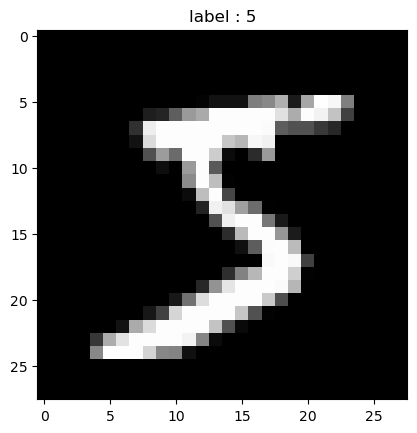

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

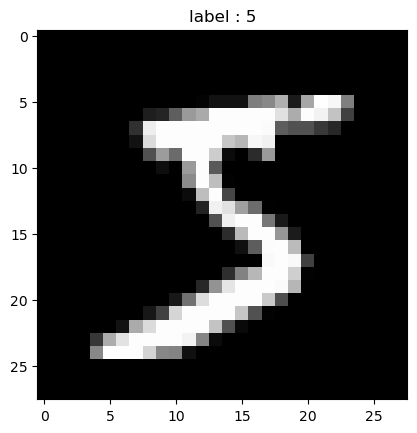

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')

plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

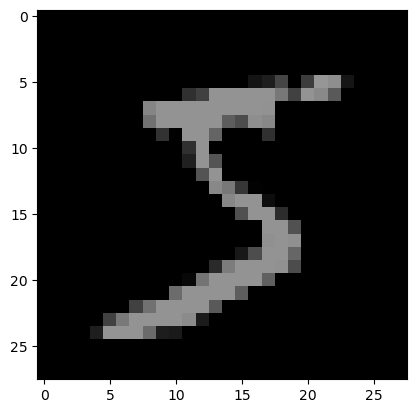

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [7]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


C:\Users\DoBUY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)


(48000, 784)
(12000, 784)


In [10]:
class GetMiniBatch:
    """
Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)


    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [11]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 6, 1, 0, 4, 1, 8, 8, 7, 0, 0, 0, 7, 0, 1, 3, 2, 5, 0, 7],
      dtype=uint8))


In [12]:
import numpy as np
import scipy

class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self, n_epochs=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=100, activate_function_key='tanh', lr=0.01, verbose=False):
        self.n_epoch = n_epochs
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activate_function_key = activate_function_key
        self.lr = lr
        self.verbose = verbose

    def initial_weight(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)

    def activation_function(self, X):
        if self.activate_function_key == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activate_function_key == 'tanh':
            return np.tanh(X)

    def softmax(self, X):
        return np.exp(X - np.max(X)) / np.sum(np.exp(X - np.max(X)), axis=1, keepdims=True)

    def loss_function(self, y, yt):
        delta =1e-7
        return -np.mean(yt*np.log(y+delta))


    def gradient_descent(self, X, y, yt):
        delta_a3 = (y - yt) / self.n_batch
        delta_b3 = np.sum(delta_a3, axis=0)
        delta_w3 = np.dot(self.z2.T, delta_a3)
        delta_z2 = np.dot(delta_a3, self.W3.T)

        self.W3 -= self.lr * delta_w3
        self.b3 -= self.lr * delta_b3

        # 2nd Layer
        if self.activate_function_key == 'sigmoid':
            delta_a2 = delta_z2 * (1 - self.activation_function_key(self.z2)) * self.activation_function(self.z2)
        elif self.activate_function_key == 'tanh':
            delta_a2 = delta_z2 * (1 - np.tanh(self.z2) ** 2)

        delta_b2 = np.sum(delta_a2, axis=0)
        delta_w2 = np.dot(self.z1.T, delta_a2)
        delta_z1 = np.dot(delta_a2, self.W2.T)

        self.W2 -= self.lr * delta_w2
        self.b2 -= self.lr * delta_b2

        # 1st Layer
        if self.activate_function_key == 'sigmoid':
            delta_a1 = delta_z1 * (1 - self.activation_function_key(self.z1)) * self.activation_function(self.z1)
        elif self.activate_function_key == 'tanh':
            delta_a1 = delta_z1 * (1 - np.tanh(self.z1) ** 2)

        delta_b1 = np.sum(delta_a1, axis=0)
        delta_w1 = np.dot(X.T, delta_a1)

        self.W1 -= self.lr * delta_w1
        self.b1 -= self.lr * delta_b1

    def fit(self, X, y, X_val=False, y_val=False):
        # initial weights
        self.initial_weight()

        # list to record the loss_function for each iteration
        self.log_loss = []
        self.log_loss_val = []

        # evaluate the estimation of train data per iteration: Accuracy
        self.log_acc = []
        self.log_acc_val = []

        for epoch in range(self.n_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            self.loss = 0
            self.true_y = np.array([])
            self.pred_y = np.array([])
            for mini_X_train, mini_y_train in get_mini_batch:
                # 1st layer
                self.z1 = self.activation_function(np.dot(mini_X_train, self.W1) + self.b1)
                # 2nd layer
                self.z2 = self.activation_function(np.dot(self.z1, self.W2) + self.b2)
                # 3rd layer
                output = self.softmax(np.dot(self.z2, self.W3) + self.b3)

                # Backpropagation
                self.gradient_descent(mini_X_train, output, mini_y_train)

                # record correct and estimated values for mini batch data
                self.true_y = np.concatenate([self.true_y, np.argmax(mini_y_train, axis=1)])
                self.pred_y = np.concatenate([self.pred_y, np.argmax(output, axis=1)])

                # loss function
                self.loss += self.loss_function(output, mini_y_train)

            # record the loss function for each iteration
            self.log_loss.append(self.loss / len(get_mini_batch))

            # Accuracy
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)

            # Calculate once val data has been entered
            if type(X_val) != bool:
                # 1st layer
                self.z1_val = self.activation_function(np.dot(X_val, self.W1) + self.b1)
                # 2nd layer
                self.z2_val = self.activation_function(np.dot(self.z1_val, self.W2) + self.b2)
                # 3rd layer
                output_val = self.softmax(np.dot(self.z2_val, self.W3) + self.b3)
                # loss function
                self.loss_val = self.loss_function(output_val, y_val)
                self.log_loss_val.append(self.loss_val)

                # Accuracy
                acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(output_val, axis=1))
                self.log_acc_val.append(acc_val)

            if self.verbose:
                print('epoch:{:>3} loss:{:>8,.3f}'.format(epoch, self.loss / self.n_batch, acc))

    def predict(self, X):
        # 1st layer
        self.pred_z1 = self.activation_function(np.dot(X, self.W1) + self.b1)
        # 2nd layer
        self.pred_z2 = self.activation_function(np.dot(self.pred_z1, self.W2) + self.b2)
        return np.argmax(np.dot(self.pred_z2, self.W3) + self.b3, axis=1)


In [13]:
#problem 1


n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print("W1 shape:", W1.shape)  # (784, 400)



W1 shape: (784, 400)


In [14]:
W1 = sigma*np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(n_nodes1)
W2 = sigma*np.random.randn(n_features, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma*np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('W1', W1.shape)
print('W2', W2.shape)
print('W3', W3.shape)
print('b1', b1.shape)
print('b2', b2.shape)
print('b3', b3.shape)

W1 (784, 400)
W2 (784, 200)
W3 (200, 10)
b1 (400,)
b2 (200,)
b3 (10,)


In [15]:
#problem 2
X=X_train[0:20]

In [25]:
z1= np.dot(X,W1)
print('z1.shape', z1.shape)
print(z1)

z1.shape (20, 400)
[[ 0.10268985  0.29945194 -0.14903611 ...  0.09537276  0.02050551
  -0.06007537]
 [ 0.16930096  0.17966895  0.11679635 ...  0.12148521  0.05674888
   0.01986155]
 [-0.01066986  0.05424055 -0.01527359 ... -0.15687821  0.05600635
  -0.12156616]
 ...
 [ 0.0062347   0.06410021  0.00772293 ...  0.01451907  0.09660617
  -0.06746501]
 [ 0.06089287  0.15196874  0.01561344 ...  0.00209744  0.13718412
  -0.01212419]
 [ 0.04079169  0.08676281 -0.02491721 ... -0.09549982  0.16652889
   0.04143132]]


In [26]:
sig1 = 1/(1+np.exp(-z1))
print('sig1:', sig1.shape)

sig1: (20, 400)


In [38]:
z2= np.dot(X,W2)
print('z1.shape', z2.shape)
print(z2)


z1.shape (20, 200)
[[-0.08656195  0.06733143 -0.07939108 ...  0.08429321  0.03319432
   0.03886627]
 [-0.01786043 -0.01816187  0.02191899 ...  0.07867559  0.04262215
   0.03558503]
 [-0.08183312 -0.11823936 -0.0290901  ... -0.09681222 -0.12914023
   0.20382596]
 ...
 [-0.12921428  0.07254334 -0.00182399 ...  0.11022742  0.01431057
   0.15801217]
 [-0.1874614   0.10384146  0.0719689  ... -0.0232818  -0.12723085
   0.02209481]
 [-0.0667201   0.00364168  0.04052295 ...  0.04337237 -0.01013738
   0.07987074]]


In [39]:
sig2 = 1/(1+np.exp(-z2))
print('sig2', sig2.shape)
print(sig2)


sig2 (20, 200)
[[0.47837301 0.5168265  0.48016265 ... 0.52106083 0.50829782 0.50971535]
 [0.49553501 0.49545966 0.50547953 ... 0.51965876 0.51065392 0.50889532]
 [0.47955313 0.47047455 0.49272799 ... 0.47581583 0.46775974 0.5507808 ]
 ...
 [0.4677413  0.51812789 0.499544   ... 0.52752899 0.50357758 0.53942106]
 [0.45327141 0.52593706 0.51798446 ... 0.49417981 0.46823513 0.50552348]
 [0.48332616 0.50091042 0.51012935 ... 0.51084139 0.49746568 0.51995708]]


In [40]:
z3 = np.dot(sig2, W3) + b3
print('z3.shape', z3.shape)
print(z3)

z3.shape (20, 10)
[[ 0.03422497  0.08310377 -0.05868635  0.01850863  0.0056093   0.06220471
   0.0039169   0.11251021  0.03031937  0.01706024]
 [ 0.03997726  0.08939969 -0.05949214  0.02123396  0.00505443  0.06913833
  -0.0009577   0.11063083  0.03267154  0.01750127]
 [ 0.0393749   0.08079294 -0.05763958  0.02151048  0.00305891  0.06678657
   0.00292128  0.10882712  0.02744259  0.01590998]
 [ 0.03752161  0.08484451 -0.06029532  0.02193725  0.00287301  0.068402
  -0.00158582  0.10900477  0.03040964  0.01593813]
 [ 0.04283787  0.08185609 -0.05688234  0.01873656  0.0071368   0.06827876
   0.00462218  0.11029156  0.02970601  0.01799378]
 [ 0.03258863  0.08609762 -0.0618497   0.02248486 -0.00327146  0.06789142
  -0.00228057  0.10868967  0.03408224  0.01824513]
 [ 0.0440488   0.08017749 -0.06042823  0.01900102  0.00474806  0.06654519
   0.00471269  0.11066351  0.0239879   0.01827837]
 [ 0.03813961  0.08602197 -0.06138514  0.02618594  0.0077572   0.06194662
   0.00521104  0.10545324  0.030848

In [41]:
sfmax = np.zeros([len(X),10])
for i in range(20):
    sfmax[i] = np.exp(z3[i])/np.sum(np.exp(z3[i]), axis =0)
    print('sfmax.shape', sfmax.shape)
    print(sfmax)
    print(np.sum(sfmax))

sfmax.shape (20, 10)
[[0.10023455 0.1052556  0.09134117 0.09867154 0.09740692 0.10307869
  0.09724221 0.10839676 0.09984384 0.09852873]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.    

In [42]:
softmax = np.exp(z3)/np.sum(np.exp(z3), axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.10023455 0.1052556  0.09134117 0.09867154 0.09740692 0.10307869
  0.09724221 0.10839676 0.09984384 0.09852873]
 [0.10064129 0.10574019 0.09111233 0.09877251 0.09718727 0.1036193
  0.09660472 0.10800917 0.09990871 0.09840451]
 [0.1007524  0.10501299 0.09143712 0.0989685  0.09715912 0.1035524
  0.09714575 0.1079986  0.09955734 0.09841578]
 [0.10055883 0.10543196 0.09118825 0.09900384 0.09713428 0.10371257
  0.09670214 0.10801025 0.0998462  0.09841168]
 [0.10094418 0.10496069 0.09136363 0.09854038 0.09740394 0.10354524
  0.09715931 0.10798814 0.09962726 0.09846721]
 [0.10012453 0.10562802 0.09110169 0.09911798 0.09659767 0.10372233
  0.09669343 0.10804153 0.10027418 0.09869864]
 [0.10119338 0.10491621 0.09115454 0.09869019 0.09729354 0.10349566
  0.0972901  0.10816394 0.09918357 0.09861889]
 [0.10055782 0.10548991 0.09103173 0.09936295 0.09754858 0.10298053
  0.09730052 0.10755976 0.09982729 0.09834091]
 [0.10059676 0.10515991 0.09143798 0.09922719 0.09736223 0.

In [43]:
softmax = np.exp(z3).T/np.sum(np.exp(z3), axis=1)
print('softmax.shape', softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape (10, 20)
[[0.10023455 0.1052556  0.09134117 0.09867154 0.09740692 0.10307869
  0.09724221 0.10839676 0.09984384 0.09852873]
 [0.10064129 0.10574019 0.09111233 0.09877251 0.09718727 0.1036193
  0.09660472 0.10800917 0.09990871 0.09840451]
 [0.1007524  0.10501299 0.09143712 0.0989685  0.09715912 0.1035524
  0.09714575 0.1079986  0.09955734 0.09841578]
 [0.10055883 0.10543196 0.09118825 0.09900384 0.09713428 0.10371257
  0.09670214 0.10801025 0.0998462  0.09841168]
 [0.10094418 0.10496069 0.09136363 0.09854038 0.09740394 0.10354524
  0.09715931 0.10798814 0.09962726 0.09846721]
 [0.10012453 0.10562802 0.09110169 0.09911798 0.09659767 0.10372233
  0.09669343 0.10804153 0.10027418 0.09869864]
 [0.10119338 0.10491621 0.09115454 0.09869019 0.09729354 0.10349566
  0.0972901  0.10816394 0.09918357 0.09861889]
 [0.10055782 0.10548991 0.09103173 0.09936295 0.09754858 0.10298053
  0.09730052 0.10755976 0.09982729 0.09834091]
 [0.10059676 0.10515991 0.09143798 0.09922719 0.09736223 0.

In [44]:
softmax = np.exp(z3)/np.sum(np.exp(z3),axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.10023455 0.1052556  0.09134117 0.09867154 0.09740692 0.10307869
  0.09724221 0.10839676 0.09984384 0.09852873]
 [0.10064129 0.10574019 0.09111233 0.09877251 0.09718727 0.1036193
  0.09660472 0.10800917 0.09990871 0.09840451]
 [0.1007524  0.10501299 0.09143712 0.0989685  0.09715912 0.1035524
  0.09714575 0.1079986  0.09955734 0.09841578]
 [0.10055883 0.10543196 0.09118825 0.09900384 0.09713428 0.10371257
  0.09670214 0.10801025 0.0998462  0.09841168]
 [0.10094418 0.10496069 0.09136363 0.09854038 0.09740394 0.10354524
  0.09715931 0.10798814 0.09962726 0.09846721]
 [0.10012453 0.10562802 0.09110169 0.09911798 0.09659767 0.10372233
  0.09669343 0.10804153 0.10027418 0.09869864]
 [0.10119338 0.10491621 0.09115454 0.09869019 0.09729354 0.10349566
  0.0972901  0.10816394 0.09918357 0.09861889]
 [0.10055782 0.10548991 0.09103173 0.09936295 0.09754858 0.10298053
  0.09730052 0.10755976 0.09982729 0.09834091]
 [0.10059676 0.10515991 0.09143798 0.09922719 0.09736223 0.

In [45]:
np.tanh(z1)

array([[ 0.1023304 ,  0.29081099, -0.14794238, ...,  0.09508464,
         0.02050264, -0.0600032 ],
       [ 0.16770175,  0.1777603 ,  0.11626814, ...,  0.12089106,
         0.05668804,  0.01985894],
       [-0.01066945,  0.05418742, -0.0152724 , ..., -0.15560379,
         0.05594786, -0.12097083],
       ...,
       [ 0.00623462,  0.06401256,  0.00772277, ...,  0.01451805,
         0.09630675, -0.06736284],
       [ 0.06081772,  0.15080957,  0.01561217, ...,  0.00209743,
         0.13632997, -0.0121236 ],
       [ 0.04076908,  0.08654575, -0.02491205, ..., -0.09521055,
         0.16500639,  0.04140763]])

In [46]:
(np.exp(z1) * np.exp(-z1)) / (np.exp(z1) + np.exp(-z1))


array([[0.49737523, 0.47839026, 0.49449799, ..., 0.4977346 , 0.4998949 ,
        0.49909909],
       [0.49291889, 0.49203691, 0.49660893, ..., 0.49633289, 0.49919597,
        0.4999014 ],
       [0.49997154, 0.49926539, 0.49994169, ..., 0.49390977, 0.49921685,
        0.49632803],
       ...,
       [0.49999028, 0.49897455, 0.49998509, ..., 0.4999473 , 0.49767585,
        0.49886427],
       [0.49907444, 0.49428142, 0.49993906, ..., 0.4999989 , 0.49533174,
        0.49996325],
       [0.4995843 , 0.49812394, 0.49984482, ..., 0.49772858, 0.49314625,
        0.49957117]])

In [47]:
#problem 3
y = y_train_one_hot[0:20]
loss = -y*np.log(sfmax)/len(y)
print('shape:\n', loss.shape)
print(loss)

shape:
 (20, 10)
[[0.         0.         0.         0.         0.         0.11361313
  0.         0.         0.         0.        ]
 [0.11480963 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.11657026 0.
  0.         0.         0.         0.        ]
 [0.         0.11248447 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.11590158]
 [0.         0.         0.11978895 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.11272966 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.1154488  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.11261366 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.        

In [48]:
#problem 4

delta_a3 =sfmax-y
delta_b3 = np.sum(delta_a3, axis=0)
delta_W3 = np.dot(z2.T, delta_a3)
delta_z2 = np.dot(delta_a3, W3.T)


In [49]:
print(delta_a3.shape)
print(delta_b3.shape)
print(delta_W3.shape)
print(delta_z2.shape)

(20, 10)
(10,)
(200, 10)
(20, 200)


In [50]:
#2nd layer
delta_a2 = delta_z2 *(1-np.tanh(z2)**2)
delta_b2 = np.sum(delta_a2, axis=0)
delta_W2 = np.dot(z1.T, delta_a2)
delta_z1 = np.dot(delta_a2, W2.T)

In [51]:
print(delta_a2.shape)
print(delta_b2.shape)
print(delta_W2.shape)
print(delta_z1.shape)

(20, 200)
(200,)
(400, 200)
(20, 784)


In [52]:
#1st Layer
delta_a1 = delta_z2 *(1-np.tanh(z2)**2)
delta_b1 = np.sum(delta_a1, axis =0)
delta_W1 = np.dot(X.T, delta_a1)

In [53]:
print(delta_a1.shape)
print(delta_b1.shape)
print(delta_W1.shape)

(20, 200)
(200,)
(784, 200)


In [ ]:
np.tanh(z1).shape

In [54]:
clf = ScratchSimpleNeuralNetrowkClassifier(n_epochs=30, n_features=784,
                                           n_nodes1=400, n_nodes2=200, n_output=10,
                                           activate_function_key ='tanh',
                                           lr=0.01,n_batch=100, verbose = True)
clf.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)
y_pred = clf.predict(X_val)

NameError: name 'y_val_one_hot' is not defined